# Execute aqui primeiro

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

## Afinamento com Hit Or Miss
---

In [5]:
def create_masks():
    masks = []
    patterns = [
            ([ [0, 0, 0],
               [-1, 1, -1],
               [1, 1, 1] ]),

            ([ [-1, 0, 0],
               [1, 1, 0],
               [-1, 1, -1] ]),

            ([ [1, 1, 1],
               [-1, 1, -1],
               [0, 0, 0] ]),

            ([ [-1, 1, -1],
               [0, 1, 1],
               [0, 0, -1] ]),
        ]
        
    for p in patterns:
        for i in range(4):
            masks.append(np.rot90(p, i))
    return masks

In [18]:
def thinning_hit_or_miss(img_path):
    
    img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
    if img is None:
        print("Erro ao carregar a imagem.")
        return

    _, binaria = cv.threshold(img.copy(), 127, 1, cv.THRESH_BINARY_INV)

    masks = create_masks()

    binaria = binaria.astype(np.uint8)

    prev = np.zeros_like(binaria)
    while True:
        temp = binaria.copy()
        for m in masks:
            j = np.array(m) == 1
            k = np.array(m) == 0

            # Hit-or-miss
            hit = cv.erode(binaria, j.astype(np.uint8))
            miss = cv.erode(1 - binaria, k.astype(np.uint8))
            h_or_m = cv.bitwise_and(hit, miss)

            binaria = cv.subtract(binaria, h_or_m)

        if np.array_equal(binaria, temp):
            break

    
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(img.copy(), cmap='gray')
    plt.title('Original')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(1 - binaria, cmap='gray')
    plt.title('Hit-or-Miss')
    plt.axis('off')
    plt.tight_layout()
    plt.show()


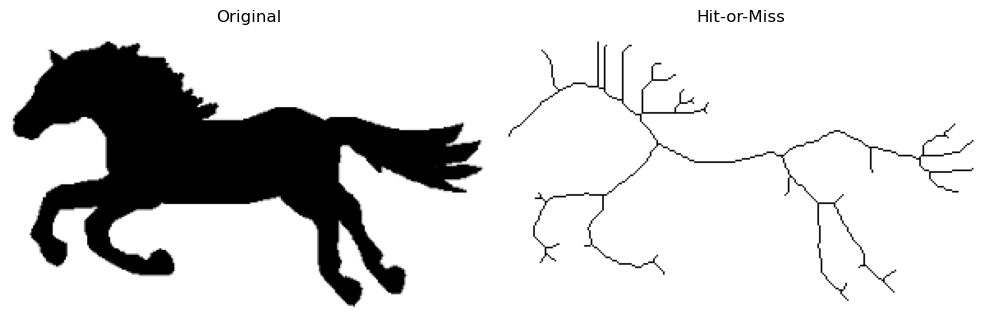

In [19]:
thinning_hit_or_miss('img/horse.png')

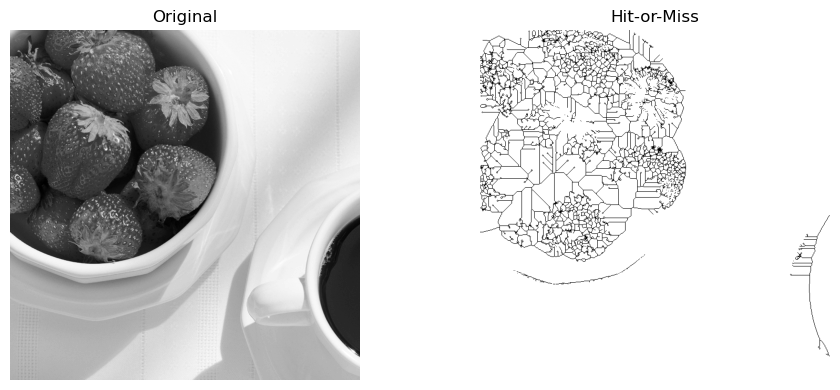

In [21]:
thinning_hit_or_miss('img/strawberries.tif')